## 1.读取数据

In [2]:
import pandas as pd
import numpy as np

file_path = 'test1.csv'
df = pd.read_csv(file_path, index_col = False, engine = 'python').dropna()

# n_iter =  508 #10000
n_iter = df['bus_power'].__len__()
array = np.array(df['bus_power'][0:n_iter]) # observations (normal about x, sigma=0.1)


FileNotFoundError: [Errno 2] No such file or directory: 'test1.csv'

In [55]:
import pandas as pd
import numpy as np

file_path = 'power_data\\test5_10.csv'
df = pd.read_csv(file_path, index_col = False, engine = 'python').dropna()

# n_iter =  508 #10000
n_iter = df['bus_power'].__len__()
array = np.array(df['bus_power'][0:n_iter]) # observations (normal about x, sigma=0.1)


In [1]:
import pandas as pd
#fh = open('D:\\K\\毕设\\data\\file_data_4\\bson\\log-1650804218')
#test=[]

dg =pd.read_csv('D:\\K\\毕设\\data\\file_data_4\\bson\\log-1650804319', delim_whitespace=True, skiprows=[0], header=None)
#test=fh.read()
#print(test[1])
dg = dg.rename(columns = {0:'Time', 1:'power'})
dg.to_csv('powertest2.csv')

## 2.移动平均过滤-去噪

In [2]:
class MovingAverageFilter:
	"""Simple moving average filter"""

	@property
	def avg(self):
		"""Returns current moving average value"""
		return self.__avg

	def __init__(self, n = 20, initial_value = 0):
		"""Inits filter with window size n and initial value"""
		self.__n = n
		self.__buffer = [initial_value/n]*n
		self.__avg = initial_value
		self.__p = 0

	def __call__(self, value):
		"""Consumes next input value"""
		self.__avg -= self.__buffer[self.__p]
		self.__buffer[self.__p] = value/self.__n
		self.__avg += self.__buffer[self.__p]
		self.__p = (self.__p  + 1) % self.__n
		return self.__avg


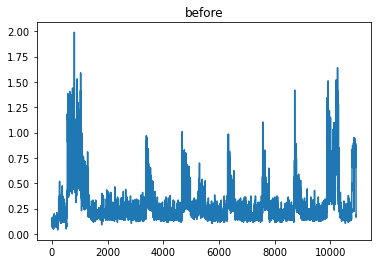

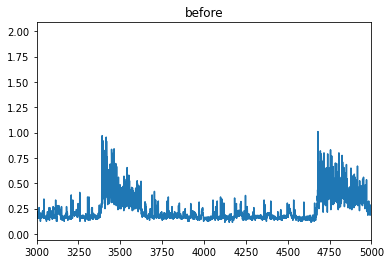

In [56]:
#  显示数据
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure()
plt.title("before")
plt.plot(array)
#plt.show()
plt.savefig("D:\\Codes\\python\\EEG_MI_wavelet_CNN_Test-main\\oriimg\\before_test5_10.jpg")
plt.close()

plt.figure()
plt.title("before")
plt.plot(array)
#plt.xlim(0,500)
#plt.savefig("D:\\Codes\\python\\EEG_MI_wavelet_CNN_Test-main\\oriimg\\after_9.2.jpg")
#plt.close()

plt.figure()
plt.title("before")
plt.plot(array)
plt.xlim(3000,5000)
plt.show()

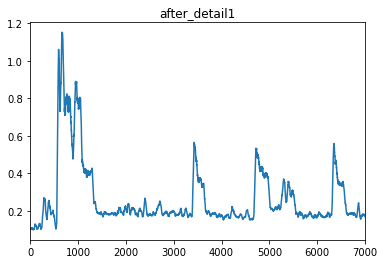

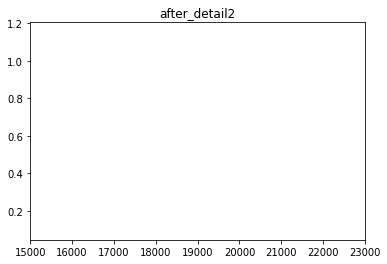

In [57]:
moving_average_filter = MovingAverageFilter(n= 40, initial_value = array[0])

array_dest = []
for num in array:
	moving_average_filter.__call__(num)
	# ret = moving_average_filter.__call__(num)
	ret = moving_average_filter.avg
	array_dest.append ( ret )

plt.figure()
plt.title("after")
plt.plot(array_dest,color='r')
plt.savefig("D:\\Codes\\python\\EEG_MI_wavelet_CNN_Test-main\\oriimg\\after_test5_10.jpg")
#plt.show()
plt.close()

plt.figure()
plt.title("after_detail1")
plt.plot(array_dest)
plt.xlim(0,7000)
#plt.ylim(0.44,0.46)
plt.show()

plt.figure()
plt.title("after_detail2")
plt.plot(array_dest)
plt.xlim(15000,23000)
#plt.ylim(0.44,0.46)
plt.show()

## 3.峰值点检测

(array([ 1681,  3926,  4721,  5297,  6603,  7972,  9307, 10525, 11501],
      dtype=int64), {'peak_heights': array([1.152875, 0.586375, 0.59525 , 0.558625, 0.5265  , 0.542625,
       0.619   , 0.8215  , 0.793   ])})


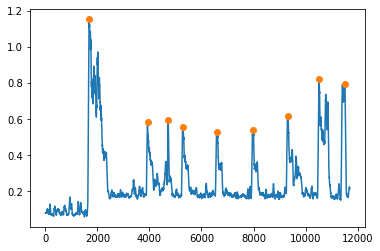

In [29]:
from scipy.signal import find_peaks

x = np.array(array_dest)
#plt.figure(figsize=(6,4))
plt.plot(np.arange(len(x)), x)
indices = find_peaks(x, height=0.5, threshold=None, distance=500,
               prominence=None, width=None, wlen=None, rel_height=None,
               plateau_size=None)
print(indices)
plt.plot(indices[0], x[indices[0]], 'o')
#plt.xlim(700,5000)
plt.show()

In [238]:
array_dest[300]

0.07025000000000008

## 4.切割为单序列

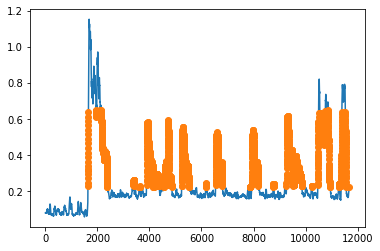

In [32]:
def cut(data):
    length=len(data)
    ans=[]
    for i in range(0,length):
        if data[i]-data[40]>0.14 and data[i]<0.65:
            ans.append(i)
    return ans

cut_array=cut(array_dest)    #单序列横坐标
cut_p=[]         #单序列纵坐标
for c in cut_array:
    cut_p.append(array_dest[c])
    
plt.plot(array_dest)
plt.plot(cut_array,cut_p,"o")
#plt.xlim(3000,10000)
plt.show()

def cut_list(data, n):    #分割为单个list
    res=[[]for i in range(n)]
    cnt=0                 #记录横坐标连续的长度
    k=0                   #第k个list
    length=len(data)
    for i in range(0,length-1):
        if data[i+1]-data[i]==1:     #判断横坐标是否连续
            cnt+=1                   #连续，长度加一
            res[k].append(data[i])   #记录进list
        else:
            if cnt>200:             #连续阈值为250
                res[k].append(data[i])
                k+=1                #满足长度条件
            else:
                res[k]=[]
            cnt=0                   #长度清零
    return res

cut_l=cut_list(cut_array,50)   #单序列横坐标

In [76]:
len(cut_array)

23451

In [205]:
def cut_list(data, n):    #分割为单个list
    res=[[]for i in range(n)]
    cnt=0                 #记录横坐标连续的长度
    k=0                   #第k个list
    length=len(data)
    for i in range(0,length-1):
        if data[i+1]-data[i]==1:     #判断横坐标是否连续
            cnt+=1                   #连续，长度加一
            res[k].append(data[i])   #记录进list
        else:
            if cnt>200:             #连续阈值为250
                res[k].append(data[i])
                k+=1                #满足长度条件
            else:
                res[k]=[]
            cnt=0                   #长度清零
    return res

In [56]:
cut_l=cut_list(cut_array,40)   #单序列横坐标

In [77]:
len(cut_l)

50

In [16]:
def draw_cutl(n):    
    cutl_p=[]         #单序列纵坐标
    for c in cut_l[n]:
        cutl_p.append(array_dest[c])

    plt.plot(array_dest)
    plt.plot(cut_l[n],cutl_p,"o")
    #plt.xlim(7000,12000)
    plt.show()

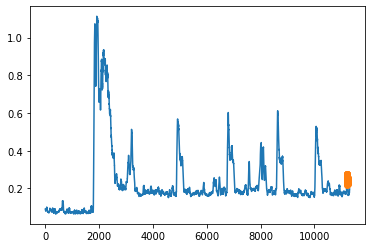

In [141]:
draw_cutl(7)

In [40]:
folder_path="D:\\Codes\\python\\EEG_MI_wavelet_CNN_Test-main\\power_imgset\\1\\"
for i in range(0,6):
    data=[]         #单序列纵坐标
    for c in cut_l[i]:
        data.append(array_dest[c])
    filename=folder_path+str(i+14)+".jpg"
    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.plot(data)
    plt.savefig(filename)
    #plt.show()
    plt.close()

In [458]:
cut_l

[[1399,
  1400,
  1401,
  1402,
  1403,
  1404,
  1405,
  1406,
  1407,
  1408,
  1409,
  1410,
  1411,
  1412,
  1413,
  1414,
  1415,
  1416,
  1417,
  1418,
  1419,
  1420,
  1421,
  1422,
  1423,
  1424,
  1425,
  1426,
  1427,
  1428,
  1429,
  1430,
  1431,
  1432,
  1433,
  1434,
  1435,
  1436,
  1437,
  1438,
  1439,
  1440,
  1441,
  1442,
  1443,
  1444,
  1445,
  1446,
  1447,
  1448,
  1449,
  1450,
  1451,
  1452,
  1453,
  1454,
  1455,
  1456,
  1457,
  1458,
  1459,
  1460,
  1461,
  1462,
  1463,
  1464,
  1465,
  1466,
  1467,
  1468,
  1469,
  1470,
  1471,
  1472,
  1473,
  1474,
  1475,
  1476,
  1477,
  1478,
  1479,
  1480,
  1481,
  1482,
  1483,
  1484,
  1485,
  1486,
  1487,
  1488,
  1489,
  1490,
  1491,
  1492,
  1493,
  1494,
  1495,
  1496,
  1497,
  1498,
  1499,
  1500,
  1501,
  1502,
  1503,
  1504,
  1505,
  1506,
  1507,
  1508,
  1509,
  1510,
  1511,
  1512,
  1513,
  1514,
  1515,
  1516,
  1517,
  1518,
  1519,
  1520,
  1521,
  1522,
  1523,


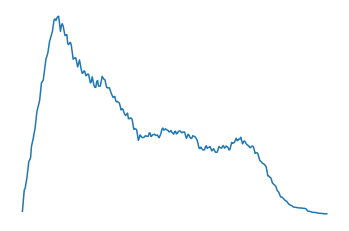

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

data=[]         #单序列纵坐标
for c in cut_l[14]:
    data.append(array_dest[c])

folder_path="D:\\Codes\\python\\EEG_MI_wavelet_CNN_Test-main\\power_imgset\\9\\"
if not os.path.exists(folder_path):  #判断是否存在文件夹如果不存在则创建为文件夹
    os.makedirs(folder_path)
filename=folder_path+str(54)+".jpg"
plt.figure()
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.plot(data)
plt.savefig(filename)
plt.show()
plt.close()

## 5.单按钮序列分割

In [33]:
def single_button_bool(list_ori, list_point):    #若单序列中包含峰值点，则为单按钮序列；否则剔除
    slice_num=len(list_ori)
    ans=[False for i in range(slice_num)]
    for l in range(slice_num):
        if len(list_ori[l])==0:    #若当前单序列为空，抛弃
            continue
        for p in range(len(list_point)-1):
            flag=False    #是否跳过循环
            #if ans[l]==False and cnt<=len(list_ori[l]) and list_ori[l][i]==list_point[p]:
            if ans[l]==False and list_ori[l][0]<=list_point[p] and list_ori[l][len(list_ori[l])-1]>=list_point[p]:
                ans[l]=True      #峰值点匹配成功，当前单序列标记为选中并退出循环
                flag=True
                break
            elif list_ori[l][0]>list_point[p] and list_ori[l][len(list_ori[l])-1]<list_point[p+1]:
                break
        if flag==True:
            continue  #break
    return ans

single_0_bool= single_button_bool(cut_l, indices[0])

def single_button(list_ori, list_bool):   #交叉计算，并将横坐标转换为data值
    ans=[]
    for i in range(len(list_ori)):
        if(list_bool[i]==True):
            tmp=[]
            for l in list_ori[i]:
                tmp.append(array_dest[l])
            ans.append(tmp)
    return ans

single_0=single_button(cut_l, single_0_bool)

len(single_0)

6

In [12]:
single_0_bool= single_button_bool(cut_l, indices[0])
#ans=[ False for i in range(3)]

In [41]:
single_0_bool[0]

False

In [143]:
single_0_bool[0]=True         #手工剔除与选择

In [13]:
def single_button(list_ori, list_bool):   #交叉计算，并将横坐标转换为data值
    ans=[]
    for i in range(len(list_ori)):
        if(list_bool[i]==True):
            tmp=[]
            for l in list_ori[i]:
                tmp.append(array_dest[l])
            ans.append(tmp)
    return ans

In [144]:
single_0=single_button(cut_l, single_0_bool)

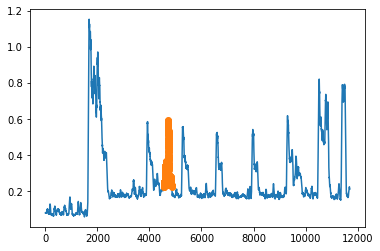

In [47]:
plt.plot(array_dest)
plt.plot(cut_l[2],single_0[0],"o")
#plt.xlim(5000,10000)
#plt.xlim(23000,26000)
plt.show()

In [42]:
del single_0[0]

In [45]:
import os
folder_path="D:\\Codes\\python\\EEG_MI_wavelet_CNN_Test-main\\power_imgset\\test5_7\\"
if not os.path.exists(folder_path):  #判断是否存在文件夹如果不存在则创建为文件夹
    os.makedirs(folder_path)
for i in range(len(single_0)):
    filename=folder_path+str(i)+".jpg"
    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.plot(single_0[i])
    plt.savefig(filename)
    #plt.show()
    plt.close()

## 6.写入npy文件

In [48]:
single_0np=np.array(single_0)
np.save('power_npyset\\test5_7.npy',single_0np)

D:\annaconda\setup\envs\EEG\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [36]:
a=np.load('single_0.npy',allow_pickle=True)
a=a.tolist()

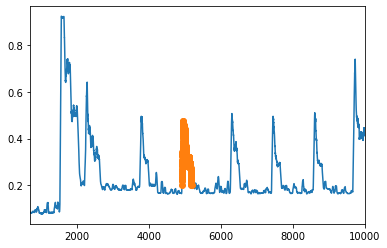

In [38]:
plt.plot(array_dest)
plt.plot(cut_l[3],a[1],"o")
plt.xlim(700,10000)
#plt.xlim(7000,12000)
plt.show()